In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

from engine import Linear, ReLU, SoftmaxCrossEntropy, MLP

%matplotlib inline

In [12]:
def one_hot_encode(y, num_classes):
    y_encoded = np.zeros((y.size, num_classes))
    y_encoded[np.arange(y.size), y] = 1
    return y_encoded

In [13]:
print("Downloading MNIST...")
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist.data.to_numpy() / 255.0 # Normalize in 0-1 range
y = mnist.target.to_numpy().astype(int) # Digits 0-9

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

y_train_enc = one_hot_encode(y_train, 10)

print(f"Training shape: {X_train.shape}")

Training shape: (63000, 784)


In [14]:
model = MLP([
    Linear(784, 128),
    ReLU(),
    Linear(128, 10),
])

loss_function = SoftmaxCrossEntropy()
epochs = 20
learning_rate = 0.1
batch_size = 64


Starting training for 20 epochs.
Epoch: 1 / 20 | Loss: 2.6299
Epoch: 2 / 20 | Loss: 0.8275
Epoch: 3 / 20 | Loss: 0.5326
Epoch: 4 / 20 | Loss: 0.4078
Epoch: 5 / 20 | Loss: 0.3426
Epoch: 6 / 20 | Loss: 0.3075
Epoch: 7 / 20 | Loss: 0.2770
Epoch: 8 / 20 | Loss: 0.2592
Epoch: 9 / 20 | Loss: 0.2405
Epoch: 10 / 20 | Loss: 0.2291
Epoch: 11 / 20 | Loss: 0.2166
Epoch: 12 / 20 | Loss: 0.2067
Epoch: 13 / 20 | Loss: 0.1993
Epoch: 14 / 20 | Loss: 0.1890
Epoch: 15 / 20 | Loss: 0.1840
Epoch: 16 / 20 | Loss: 0.1770
Epoch: 17 / 20 | Loss: 0.1718
Epoch: 18 / 20 | Loss: 0.1662
Epoch: 19 / 20 | Loss: 0.1611
Epoch: 20 / 20 | Loss: 0.1559
Evaluating.
Test accuracy: 0.9327142857142857
Prediction 6, True: 6
Prediction 2, True: 2
Prediction 7, True: 7
Prediction 5, True: 5
Prediction 7, True: 7


Text(0, 0.5, 'Loss')

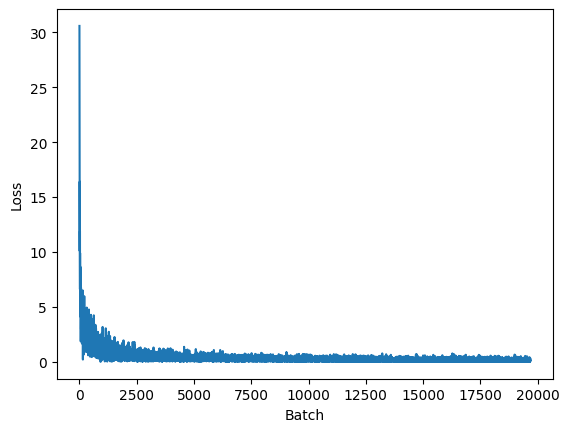

In [ ]:
loss_history = []

print(f"Starting training for {epochs} epochs.")
num_batches = X_train.shape[0] // batch_size

for epoch in range(epochs):
    # shuffle on epoch start
    perm = np.random.permutation(X_train.shape[0]) # gives indices
    X_train = X_train[perm] # (n_samples, 784)
    y_train_enc = y_train_enc[perm]
    
    total_loss = 0
    
    for i in range(num_batches):
        start = i * batch_size
        end = (i+1) * batch_size
        x_batch = X_train[start:end] # (B, 784)
        y_batch = y_train_enc[start:end] # (B, 10)
        
        logits = model.forward(x_batch) # (B, 10)
        loss = loss_function.forward(logits, y_batch)
        total_loss += loss
        loss_history.append(loss)
        
        dlogits = loss_function.backward()
        model.backward(dlogits)
        
        model.step(learning_rate)
        
    avg_loss = total_loss / num_batches
    print(f"Epoch: {epoch+1} / {epochs} | Loss: {avg_loss:.4f}")

print("\nEvaluating.\n")

# Forward pass on test set
test_logits = model.forward(X_test)
preds = test_logits.argmax(axis=1) # Get max score pred, shape is (B)

accuracy = np.mean(preds == y_test)
print(f"Test accuracy: {accuracy}")

for i in range(5):
    print(f"Prediction {preds[i]}, True: {y_test[i]}")

plt.plot(loss_history)
plt.xlabel('Batch')
plt.ylabel('Loss')

plt.show()